In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun
import numpy as np
import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')
import tqdm

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm


import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa


sys.path.append('my_funcs/')
from plot_funcs import plot_density, plot_velocity
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import pipeline
from pipeline_2D import to_osyris_ivs

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


# Sink 13

Initialising patch data


100%|██████████| 4165/4165 [00:44<00:00, 93.99it/s] 


22735279.425052598
Looping over DISPATCH data to extract data at highest level


100%|██████████| 4155/4155 [00:15<00:00, 270.08it/s]


Setting up Osyris data structure


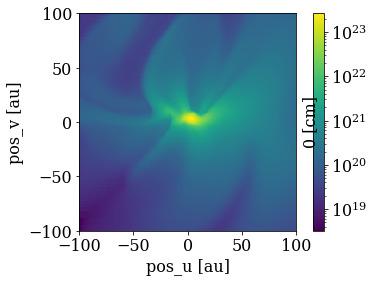

In [3]:
ramses_pos = np.array([0.22130730, 0.061598696, 0.025191988])
data = pipeline_nosink(snap = 222, run = '', sink_pos = np.array([ 0.19190208, -0.43587491,  0.28830715]), data = '/groups/astro/kxm508/codes/dispatch2/experiments/ramses_snapshots/data/core_13/')
print(data.time)
data.calc_L()
variable = ['d']
data.to_osyris_ivs(variables=variable, resolution=400, view = 200, viewpoint=np.array([1,1,0]), plot = True)

In [5]:
data_13 = pipeline_nosink(snap = 223, run = 'my_core_13lacc', sink_pos = np.array([ 0.19190208, -0.43587491,  0.28830715]))
print(data.time)
data.calc_L()
variable = ['d']
data_13.to_osyris_ivs(variables=variable, resolution=400, view = 200, viewpoint=np.array([1,1,0]))

Initialising patch data


100%|██████████| 4165/4165 [00:17<00:00, 232.95it/s]


22735279.425052598
Looping over DISPATCH data to extract data at highest level


100%|██████████| 4155/4155 [00:13<00:00, 304.70it/s]


Setting up Osyris data structure


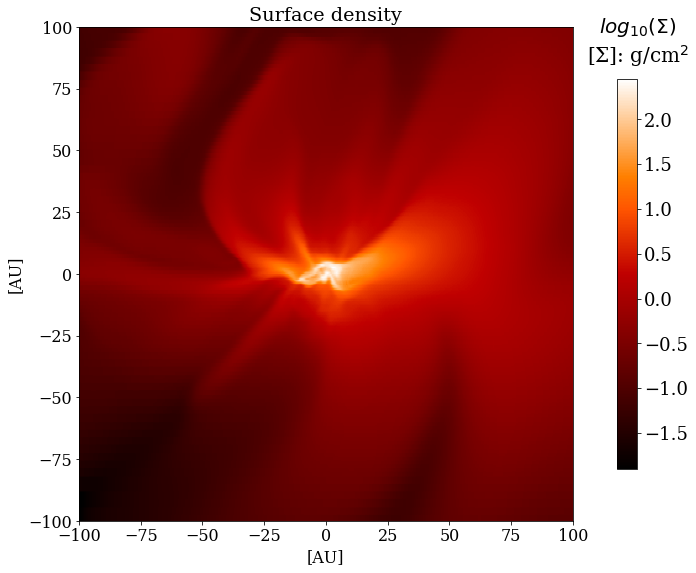

In [6]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_13.osyris_ivs[0] * data.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [7]:
data_13.sn.sinks.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

# Sink 162

In [2]:
ramses_pos_162 = np.array([0.22130730, 0.061598696, 0.025191988])
print('DISPATCH pos:', ramses_pos_162 - 0.5)

DISPATCH pos: [-0.2786927  -0.4384013  -0.47480801]


Initialising patch data


100%|██████████| 3851/3851 [00:16<00:00, 236.96it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 3841/3841 [00:12<00:00, 298.80it/s]


Setting up Osyris data structure


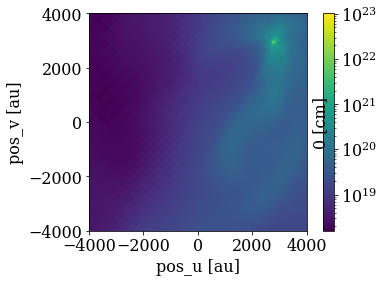

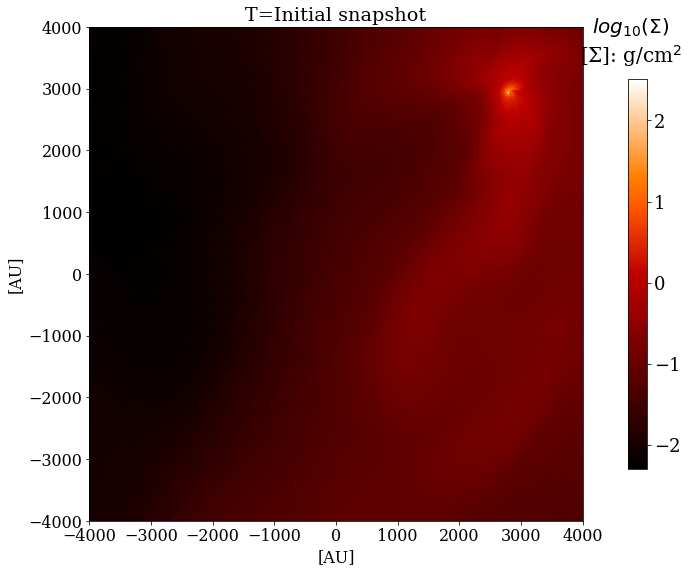

In [3]:

data_162 = pipeline_nosink(snap = 402, run = 'my_core_sink162', sink_pos = ramses_pos_162 - 0.5)


variable = ['d']
view = 8e3
data_162.to_osyris_ivs(variables=variable, resolution=400, view = view, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)
extent = view // 2
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_162.osyris_ivs[0] * data_162.cgs_density), extent = (-extent, extent, -extent, extent), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T=Initial snapshot', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 3851/3851 [00:15<00:00, 247.57it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 1776/1776 [00:07<00:00, 234.50it/s]


Setting up Osyris data structure


NameError: name 'data_162' is not defined

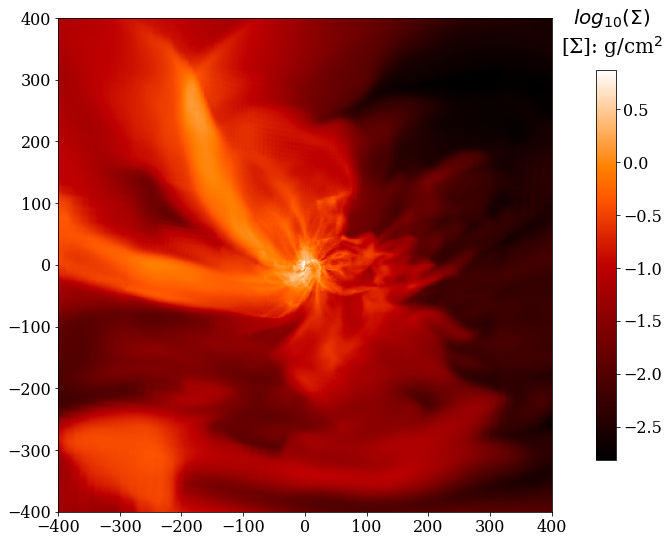

In [2]:
data_161 = pipeline(snap=419, run='my_core_sink161', sink_id=161)
data_161.calc_L()
variable = ['d']
data_161.to_osyris_ivs(variables=variable, view = 8e2)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_161.osyris_ivs[0] * data_161.cgs_density), extent = (-4e2, 4e2, -4e2, 4e2), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_161.time - data_162.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [29]:
data_161.time - data_162i.time

7019.864937860519

# Sink 6

In [12]:
0.01 * 90

0.9

In [18]:
ramses_pos_6 = np.array([0.67592005, 0.049702459, 0.78114466])

Initialising patch data


100%|██████████| 4756/4756 [00:52<00:00, 90.08it/s] 


22735279.425052598
Looping over DISPATCH data to extract data at highest level


100%|██████████| 4746/4746 [00:18<00:00, 251.14it/s]


Setting up Osyris data structure


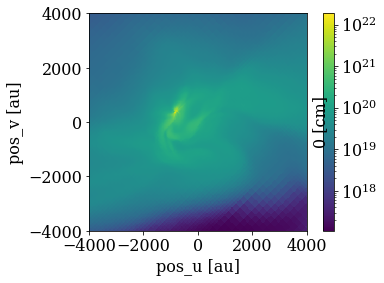

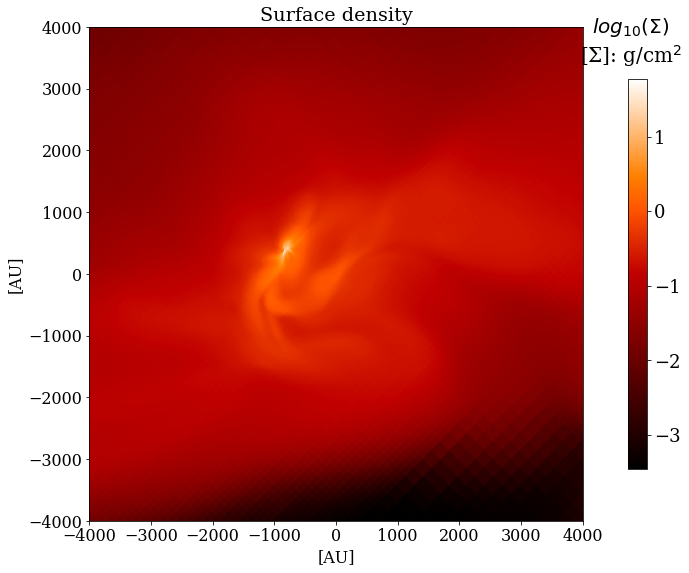

In [19]:
data_6 = pipeline_nosink(snap = 158, run = '', sink_pos = ramses_pos_6 - 0.5, data = '/groups/astro/buks/codes/dispatch2/experiments/ramses_snapshots/data/core_006/')
print(data.time)
data.calc_L()
variable = ['d']
data_6.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_6.osyris_ivs[0] * data.cgs_density), extent = (-4e3, 4e3, -4e3, 4e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 4756/4756 [00:03<00:00, 1255.68it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 4746/4746 [00:18<00:00, 256.99it/s]


Setting up Osyris data structure


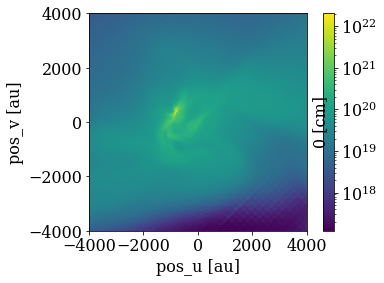

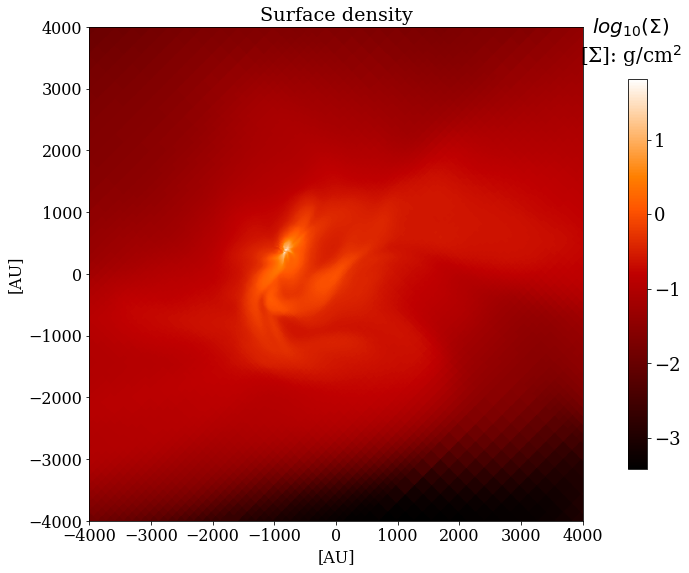

In [48]:
data_6 = pipeline_nosink(snap = 159, run = 'my_core_sink6', sink_pos = ramses_pos_6 - 0.5)
data_6.calc_L()
data_6.to_osyris_ivs(variables = ['d'], resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)


fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_6.osyris_ivs[0] * data_6.cgs_density), extent = (-4e3, 4e3, -4e3, 4e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [15]:
data.sn.sinks[6][0].velocity

array([ 1.38851552e-02,  2.49518093e-02, -5.70663049e-05])

In [20]:
data_6i = pipeline(snap=159, run='my_core_sink6', sink_id=6)

Initialising patch data


100%|██████████| 4756/4756 [00:20<00:00, 229.62it/s]


Initialising patch data


100%|██████████| 4756/4756 [00:03<00:00, 1279.58it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 1871/1871 [00:08<00:00, 223.23it/s]


Setting up Osyris data structure


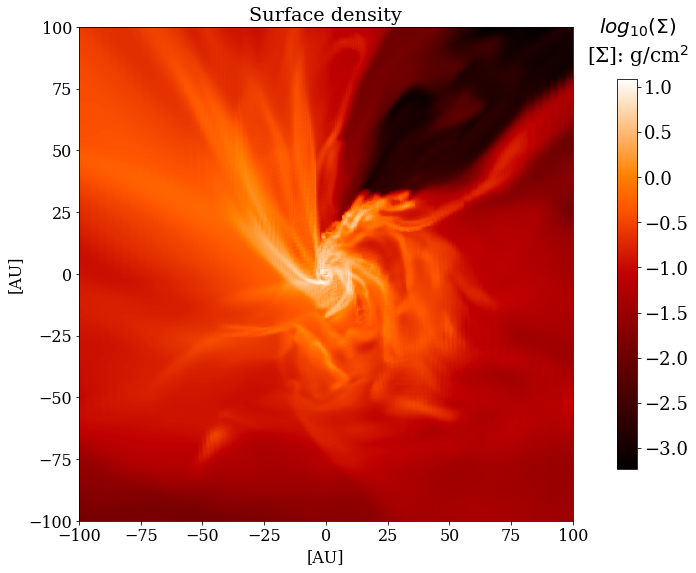

In [30]:
data_6 = pipeline(snap=276, run='my_core_sink6', sink_id=6)
data_6.calc_L()
variable = ['d']
data_6.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_6.osyris_ivs[0] * data.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [27]:
np.sum(data_6.star_vel**2)**0.5

0.0007010124681514836

In [28]:
data_6.time - data_6i.time

15256.796242438257

In [29]:
data_6.sn.sinks.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

# Sink 225

In [24]:
ramses_pos_225 = np.array([0.31840596, 0.74889234, 0.95780638])
print('DISPATCH pos:', ramses_pos_225 - 0.5)

DISPATCH pos: [-0.18159404  0.24889234  0.45780638]


Initialising patch data


100%|██████████| 4903/4903 [00:05<00:00, 828.28it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 4893/4893 [00:23<00:00, 209.94it/s]


Setting up Osyris data structure


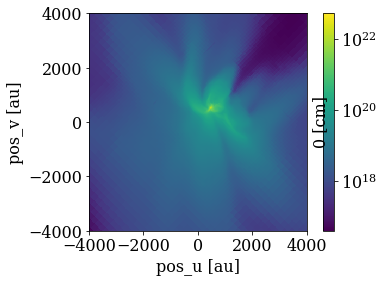

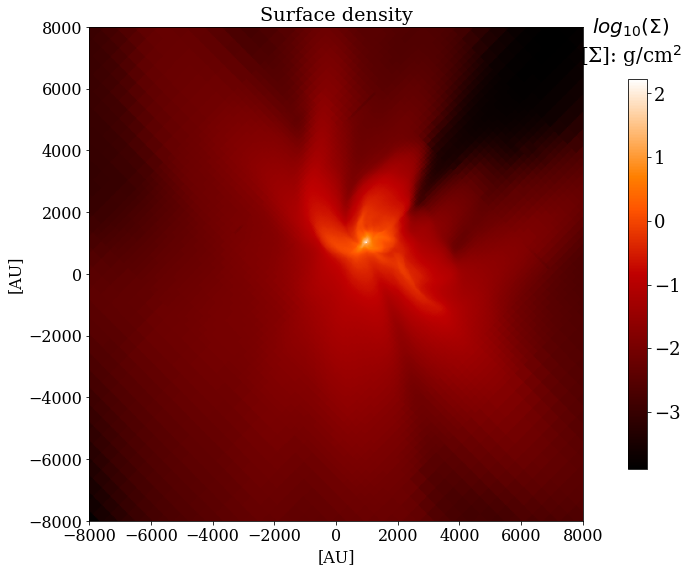

In [26]:
data_225i = pipeline_nosink(snap = 445, run = '.', sink_pos = ramses_pos_225 - 0.5, data = '/groups/astro/buks/codes/dispatch2/experiments/ramses_snapshots/data/core_225/')
variable = ['d']
data_225i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_225i.osyris_ivs[0] * data_225i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 4903/4903 [00:18<00:00, 271.52it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2024/2024 [00:08<00:00, 236.73it/s]


Setting up Osyris data structure


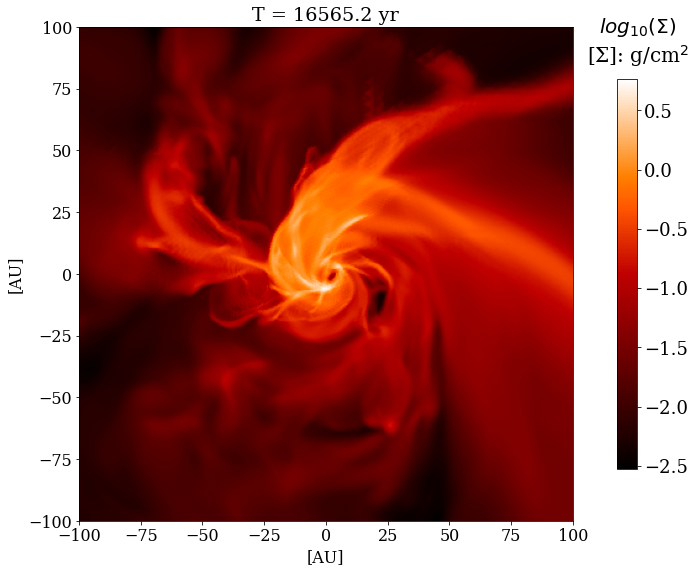

In [27]:
data_225 = pipeline(snap=572, run='my_core_sink225', sink_id=225)
data_225.calc_L()
variable = ['d']
data_225.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_225.osyris_ivs[0] * data_225.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T = {data_225.time - data_225i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

#print(data_225.sn.sinks[225][0].position, ramses_pos_225 - 0.5)

In [13]:
data_225.time - data_225i.time

16430.3959534131

Initialising patch data


100%|██████████| 4903/4903 [00:13<00:00, 366.23it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 1840/1840 [00:07<00:00, 250.88it/s]


Setting up Osyris data structure


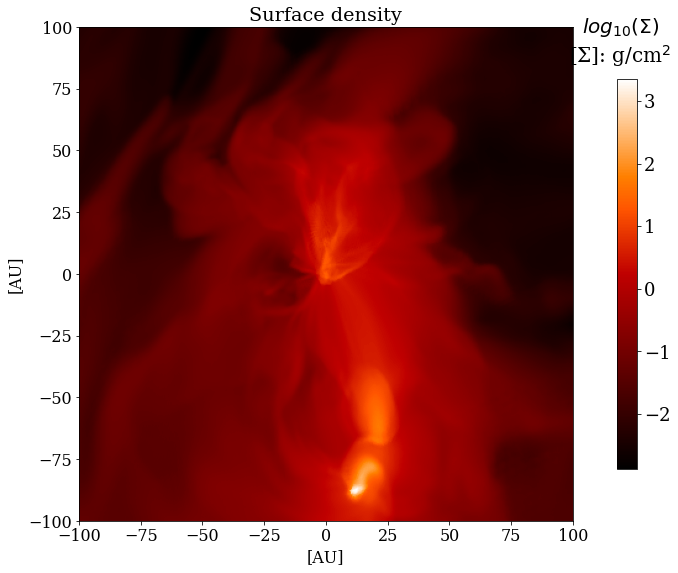

In [36]:
data_22501 = pipeline(snap=457, run='my_core_sink225_01', sink_id=225)
data_22501.calc_L()
variable = ['d']
data_22501.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_22501.osyris_ivs[0] * data_22501.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

#print(data_225.sn.sinks[225][0].position, ramses_pos_225 - 0.5)

In [39]:
np.sum(data_22501.star_vel**2)**0.5

0.045684077167585026

In [37]:
data_22501.time - data_225i.time

6020.131850738078

In [45]:
data_22501.sn.sinks.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [42]:
for key in np.arange(225, 230):
    print(np.sum((data_22501.sn.sinks[key][0].position - data_22501.star_pos)**2)**0.5 * data_22501.au_length)

0.0
219.20594045719815
148.30670150960063
86.8801901710895
72.36975052635145


In [40]:
data_22501.sn.sinks.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

# Sink 180

In [2]:
ramses_pos_180 = np.array([0.96270836, 0.46696171, 0.97030800])
print('DISPATCH pos:', ramses_pos_180 - 0.5)

DISPATCH pos: [ 0.46270836 -0.03303829  0.470308  ]


Initialising patch data


100%|██████████| 4855/4855 [00:48<00:00, 100.89it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 4845/4845 [00:15<00:00, 319.66it/s]


Setting up Osyris data structure


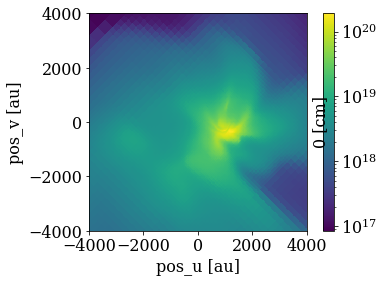

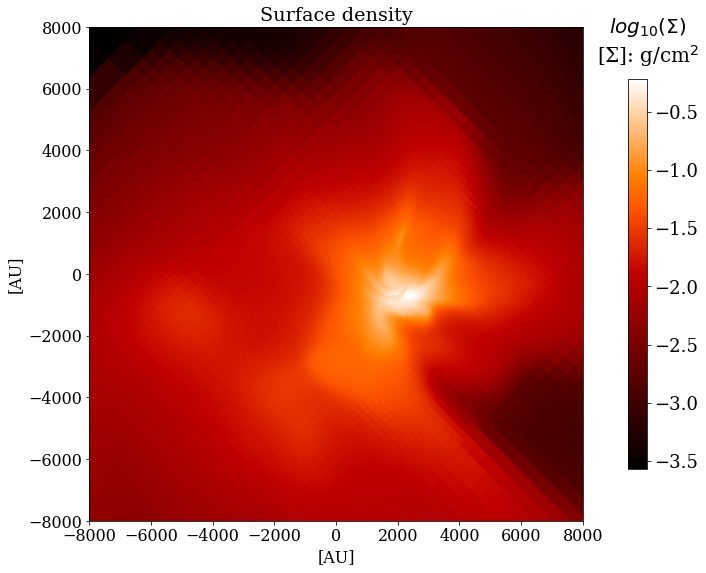

In [3]:
data_180 = pipeline_nosink(snap = 403, run = '.', sink_pos = ramses_pos_180 - 0.5, data = '/groups/astro/buks/codes/dispatch2/experiments/ramses_snapshots/data/core_180/')
data_180.to_osyris_ivs(variables=['d'], resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_180.osyris_ivs[0] * data_180.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 4855/4855 [00:18<00:00, 259.18it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2497/2497 [00:10<00:00, 248.12it/s]


Setting up Osyris data structure


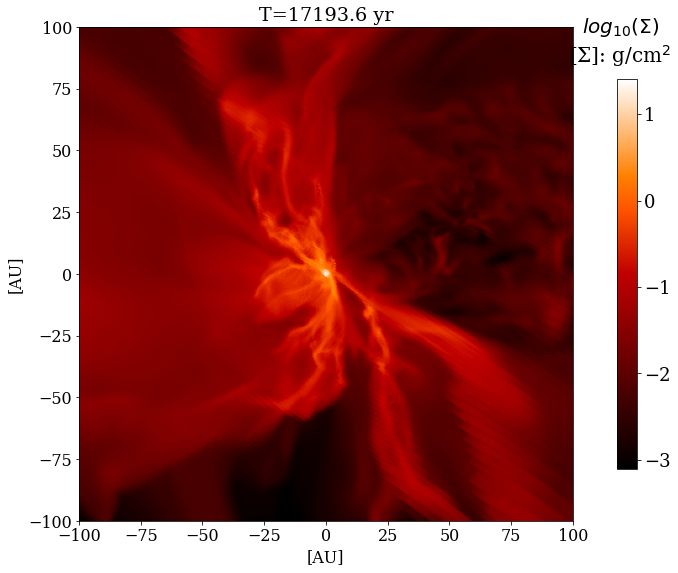

In [4]:
data_178 = pipeline(snap=437, run='my_core_sink178', sink_id=178)
data_178.calc_L()
variable = ['d']
data_178.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_178.osyris_ivs[0] * data_178.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_178.time - data_180.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

#print(data_180.sn.sinks[178][0].position, ramses_pos_180 - 0.5)


In [33]:
data_178.time - data_180i.time

3086.1325732953846

In [35]:
np.sum(data_178.star_vel**2)**0.5

0.04167094504429985

# Sink 122

DISPATCH pos: [ 0.21907158  0.09524271 -0.15905574]
Initialising patch data


100%|██████████| 5026/5026 [01:06<00:00, 75.51it/s] 


Looping over DISPATCH data to extract data at highest level


100%|██████████| 5016/5016 [00:17<00:00, 293.34it/s]


Setting up Osyris data structure


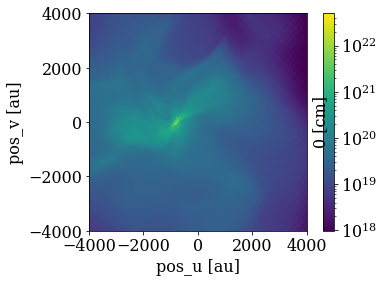

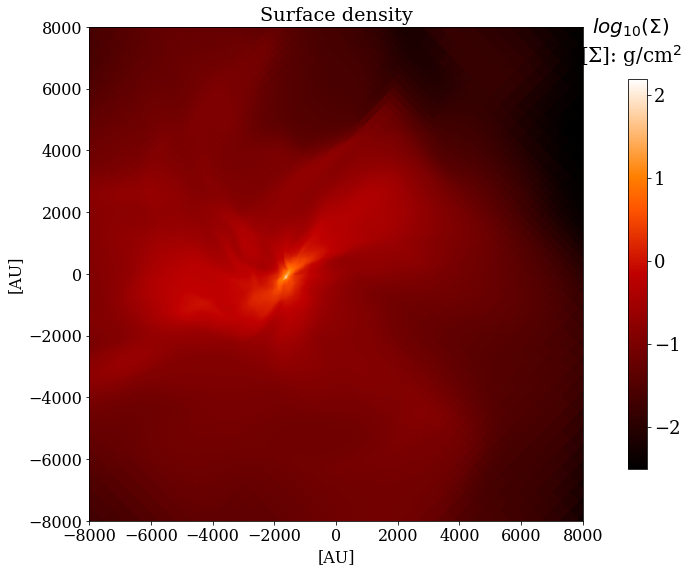

In [3]:
ramses_pos_122 = np.array([0.71907158, 0.59524271, 0.34094426])
print('DISPATCH pos:', ramses_pos_122 - 0.5)


data_122i = pipeline_nosink(snap = 341, run = '.', sink_pos = ramses_pos_122 - 0.5, data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_122/data_dispatch')
variable = ['d']
data_122i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_122i.osyris_ivs[0] * data_122i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 5026/5026 [00:19<00:00, 259.45it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2164/2164 [00:05<00:00, 363.37it/s]


Setting up Osyris data structure


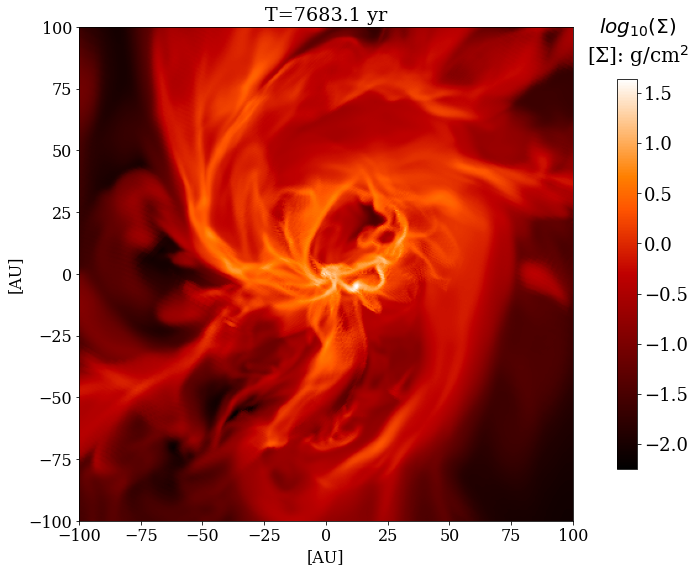

In [4]:
data_122 = pipeline(snap=400, run='my_core_sink122', sink_id=122)
data_122.calc_L()
variable = ['d']
data_122.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_122.osyris_ivs[0] * data_122.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_122.time - data_122i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Sink 82

In [5]:
ramses_pos_82 = np.array([0.83483083, 0.94080048, 0.30677056])
print('DISPATCH pos:', ramses_pos_82 - 0.5)

DISPATCH pos: [ 0.33483083  0.44080048 -0.19322944]


Initialising patch data


100%|██████████| 6310/6310 [01:21<00:00, 77.08it/s] 


Looping over DISPATCH data to extract data at highest level


100%|██████████| 6300/6300 [00:21<00:00, 291.97it/s]


Setting up Osyris data structure


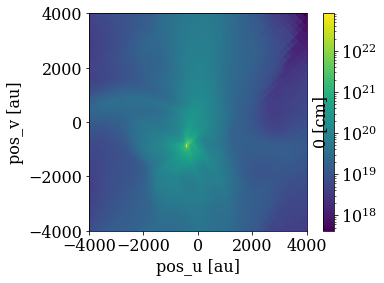

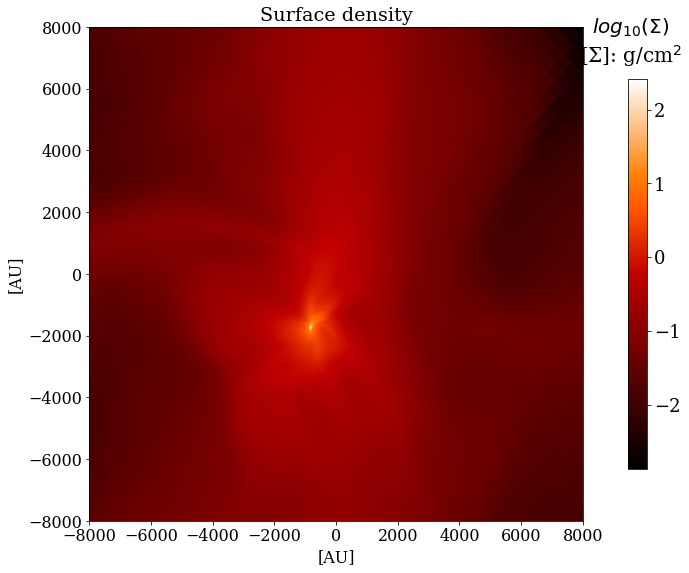

In [6]:
data_82i = pipeline_nosink(snap = 235, run = '.', sink_pos = ramses_pos_82 - 0.5, data = '/groups/astro/buks/codes/dispatch2/experiments/ramses_snapshots/data/core_082')
variable = ['d']
data_82i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_82i.osyris_ivs[0] * data_82i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 6310/6310 [00:25<00:00, 246.96it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2910/2910 [00:10<00:00, 289.29it/s]


Setting up Osyris data structure


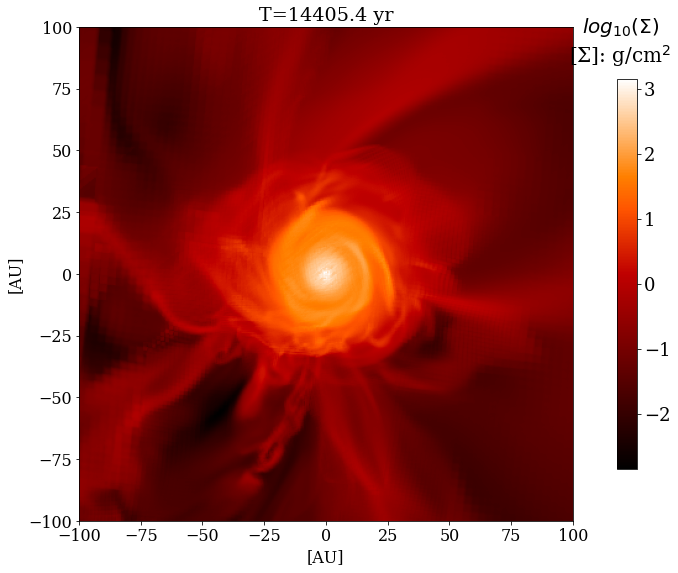

In [7]:
data_82 = pipeline(snap=345, run='my_core_sink82', sink_id=80)
data_82.calc_L()
variable = ['d']
data_82.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_82.osyris_ivs[0] * data_82.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_82.time - data_82i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [26]:
data_82.time - data_82i.time

4103.804706420749

# Sink 25

In [3]:
ramses_pos_25 = np.array([0.31512337, 0.98594382, 0.063366837])
print('DISPATCH pos:', ramses_pos_25 - 0.5)

data_25i = pipeline_nosink(snap = 212, run = '.', sink_pos = ramses_pos_25 - 0.5, data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_025/data_dispatch')
variable = ['d']
data_25i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_25i.osyris_ivs[0] * data_25i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

DISPATCH pos: [-0.18487663  0.48594382 -0.43663316]
Initialising patch data


100%|██████████| 6212/6212 [01:07<00:00, 91.53it/s] 


Looping over DISPATCH data to extract data at highest level


 57%|█████▋    | 3548/6202 [00:11<00:03, 713.25it/s]

Initialising patch data


100%|██████████| 6212/6212 [00:04<00:00, 1260.95it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2596/2596 [00:10<00:00, 239.31it/s]


Setting up Osyris data structure


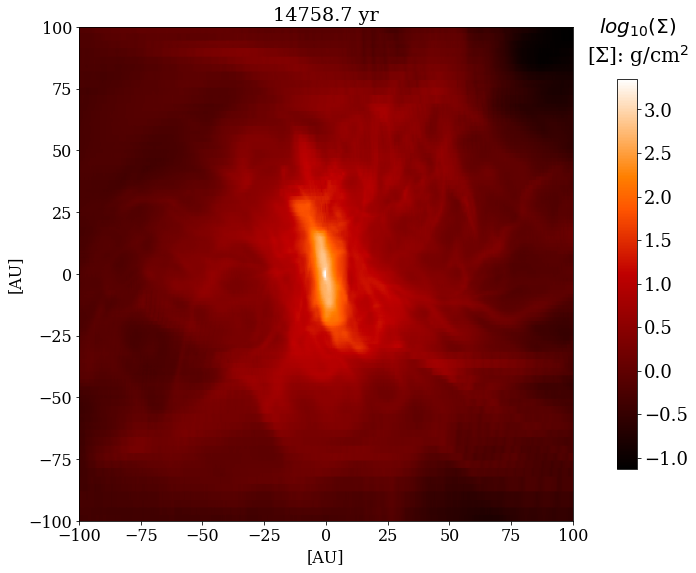

In [4]:
data_25 = pipeline(snap=242, run='my_core_sink25', sink_id=24)
data_25.calc_L()
variable = ['d']
data_25.to_osyris_ivs(variables=variable, view = 200, viewpoint=np.cross(np.array([0,0,1]), data_25.L), dz = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_25.osyris_ivs[0] * data_25.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'{data_25.time - data_25i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [17]:
data_25.time - data_25i.time

3761.5917655453086

# Sink 14

In [2]:
ramses_pos_14 = np.array([0.058000602, 0.17543303, 0.76258907])
print('DISPATCH pos:', ramses_pos_14 - 0.5)

DISPATCH pos: [-0.4419994  -0.32456697  0.26258907]


Initialising patch data


100%|██████████| 4715/4715 [00:56<00:00, 84.06it/s] 


Looping over DISPATCH data to extract data at highest level


100%|██████████| 4705/4705 [00:16<00:00, 285.86it/s]


Setting up Osyris data structure


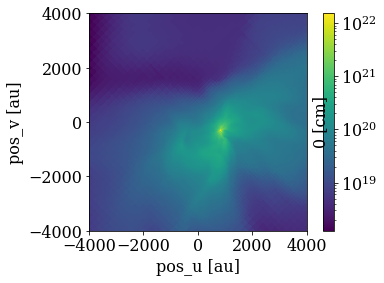

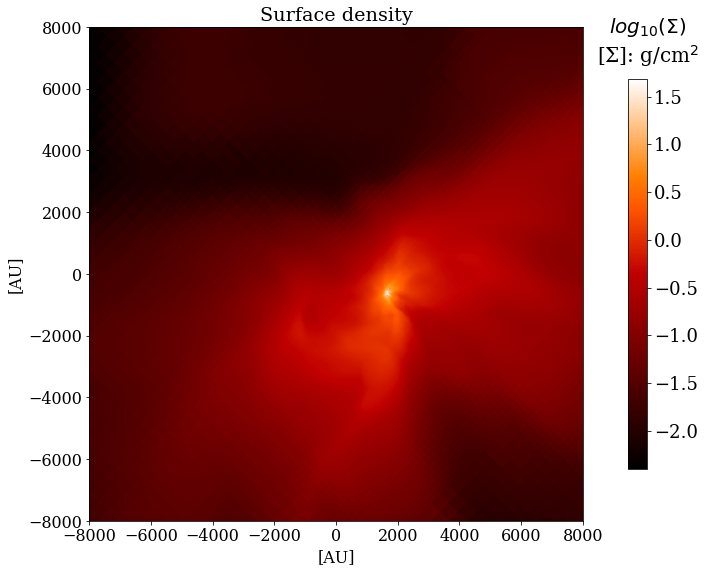

In [3]:
data_14i = pipeline_nosink(snap = 176, run = '.', sink_pos = ramses_pos_14 - 0.5, data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_014/data_dispatch')
variable = ['d']
data_14i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_14i.osyris_ivs[0] * data_14i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 4715/4715 [00:03<00:00, 1294.17it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 1847/1847 [00:07<00:00, 235.15it/s]


Setting up Osyris data structure


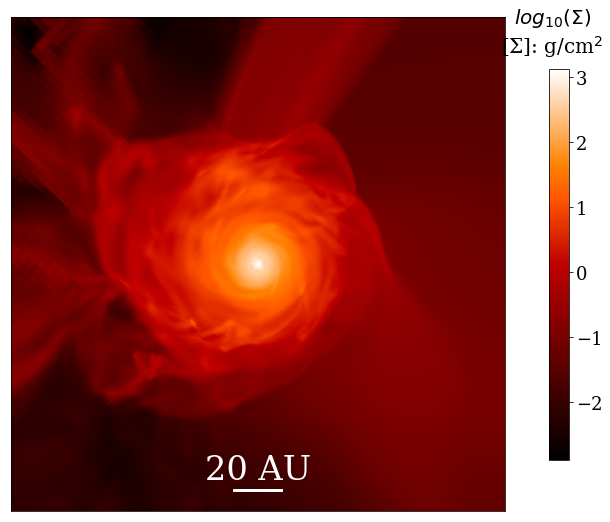

In [6]:
data_13n = pipeline(snap=233, run='my_core_sink13', sink_id=13)
data_13n.calc_L()
variable = ['d']
view = 200
data_13n.to_osyris_ivs(variables=variable, view = view)#, dz = 200, viewpoint=np.cross(np.array([0,0,1]), data_13n.L))#, dz = view, viewpoint=np.cross(data_13n.L, np.array([0,0,1])))

extent = view // 2
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_13n.osyris_ivs[0] * data_13n.cgs_density), extent = (-extent, extent, -extent, extent), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)

axs.set_xticks([]); axs.set_yticks([])
scalebar = AnchoredSizeBar(axs.transData, 20, '20 AU', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28*1.2),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)


#axs.set(title = f'T={data_13n.time - data_14i.time:4.1f}', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

#print(data_225.sn.sinks[225][0].position, ramses_pos_225 - 0.5)

In [8]:
data_13n.M_star / M_sun

<Quantity 0.23014664>

In [21]:
data_13n.time - data_14i.time

12292.822430770844